##### 1. Import Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

##### 2. Load Data to pandas dataframe

C:\Users\samit\AppData\Local\Temp\ipykernel_18124\3966719968.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('datasets/sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


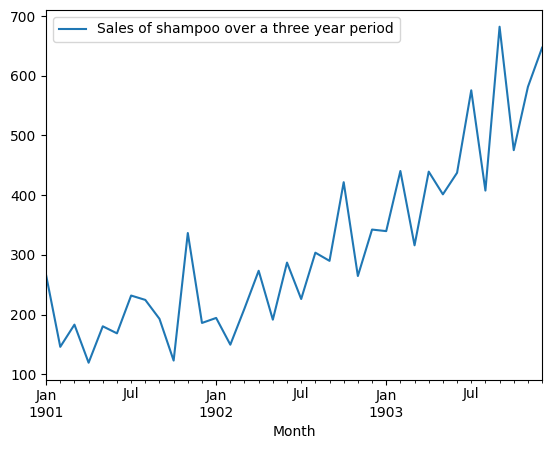

In [31]:
# pandas datetimeindex
def parser(x):
    return pd.to_datetime('190' + x, format='%Y-%m')

series = pd.read_csv('datasets/sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)

# print(series.head())

# plot graph
series.plot()
plt.show()

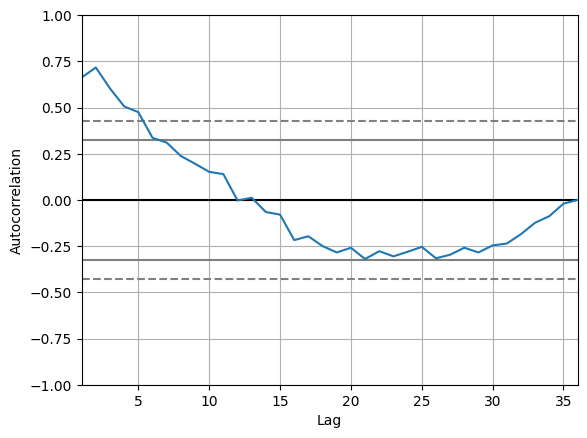

In [32]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
plt.show()

##### 3. Train Model

In [33]:
# from statsmodels.tsa.stattools import adfuller

model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

d:\PythonDABCEL\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\PythonDABCEL\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\PythonDABCEL\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                           SARIMAX Results                                           
Dep. Variable:     Sales of shampoo over a three year period   No. Observations:                   36
Model:                                        ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                                       Fri, 18 Aug 2023   AIC                            408.969
Time:                                               14:38:06   BIC                            418.301
Sample:                                           01-01-1901   HQIC                           412.191
                                                - 12-01-1903                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014     

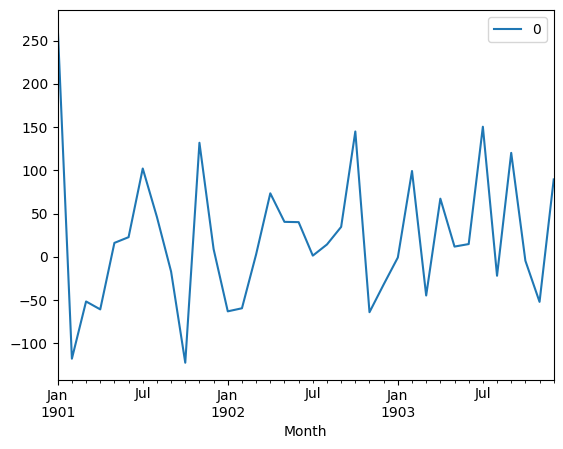

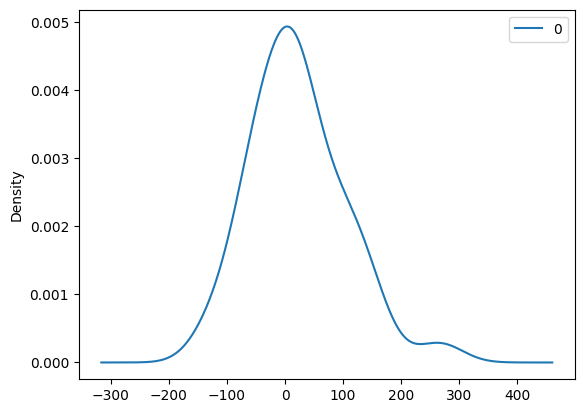

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [36]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())